- 랜덤하게 클러스터 중심을 선택하고 점차 가장 가까운 샘플의 중심으로 이동

In [6]:
import numpy as np
fruits = np.load('fruits_300_data')
fruits_2d = fruits.reshape(-1, 100*100)

In [8]:
print(fruits_2d.shape)

(300, 10000)


### K-Means

In [11]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_2d)

KMeans(n_clusters=3, random_state=42)

- 군집된 결과는 KMeans 클래스 객체의 labels_속성에 저장
- labels_ : 배열의 길이 = 샘플의 길이 

In [12]:
print(km.labels_)

[2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [13]:
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2]), array([111,  98,  91], dtype=int64))


In [16]:
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1):
    n=len(arr) # n은 샘플의 개수
    # 한 줄에 10개씩 이미지를 그림. 샘플 개수를 10으로 나누어 전체 행 개수 계산
    rows = int(np.ceil(n/10))
    # 행이 1개이면 열의 개수는 샘플 개수입니다. 그렇지 않으면 10개
    cols = n if rows<2 else 10
    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)
    
    for i in range(rows):
        for j in range(cols):
            if i*10+j<n : # n개까지만 그리기
                axs[i, j].imshow(arr[i*10+j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

#### 불리언 인덱싱

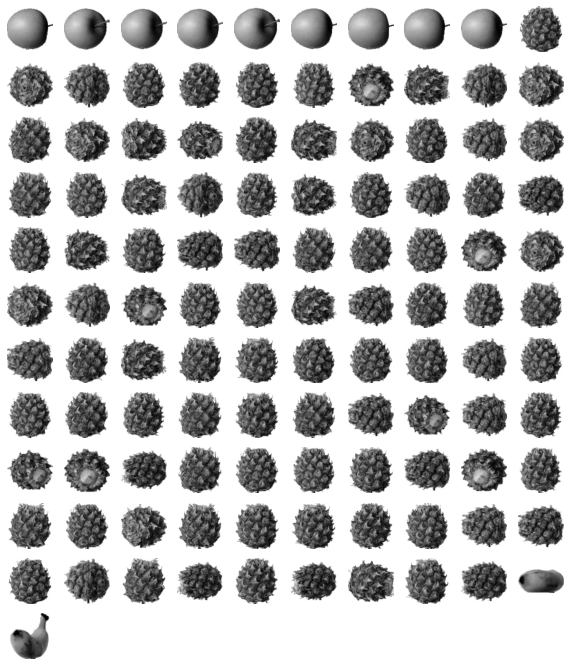

In [17]:
draw_fruits(fruits[km.labels_==0])

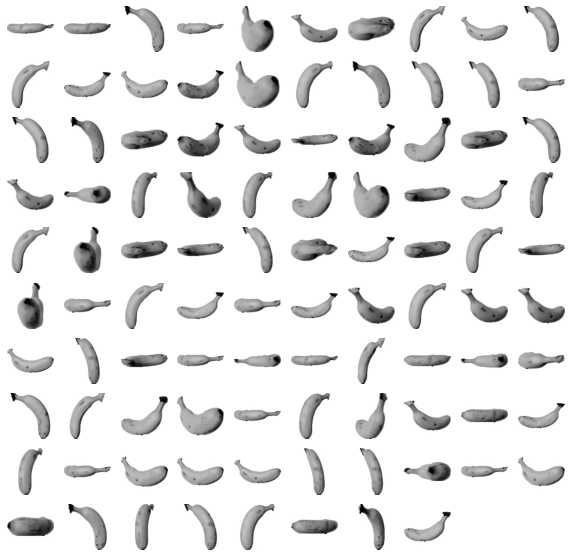

In [18]:
draw_fruits(fruits[km.labels_==1])

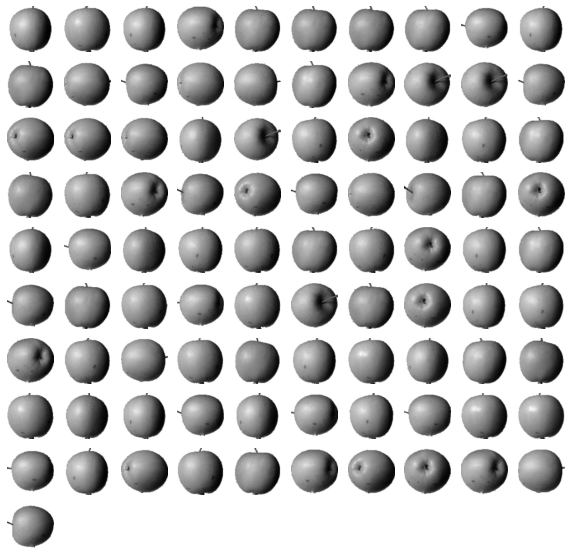

In [19]:
draw_fruits(fruits[km.labels_==2])

- cluster_centers_ : KMeans 클래스가 최종적으로 찾은 클러스터 중심 저장
- fruits_2d 샘플의 클러스터 중심이기 때문에 2차원 배열로 변경

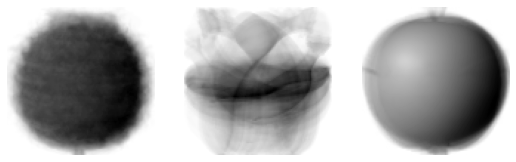

In [20]:
draw_fruits(km.cluster_centers_.reshape(-1, 100,100), ratio=3)

- transform() : 훈련 데이터 샘플에서 클러스터 중심까지 거리로 변환

In [21]:
print(km.transform(fruits_2d[100:101])) # 첫번째 클러스터까지의 거리가 가장 작음

[[3393.8136117  8837.37750892 5267.70439881]]


In [22]:
print(km.predict(fruits_2d[100:101]))

[0]


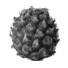

In [23]:
draw_fruits(fruits[100:101])

In [24]:
print(km.n_iter_) # 알고리즘의 반복 횟수 

4


#### 최적의 k 찾기 
- elbow 방법

- inertia(이너셔) : 클러스터 중심과 클러스터에 속한 샘플 사이 거리의 제곱 합 -> 클러스터에 속한 샘플이 얼마나 가깝게 모여 있는지 나타내는 값
- inertia_ : 이너셔 계산

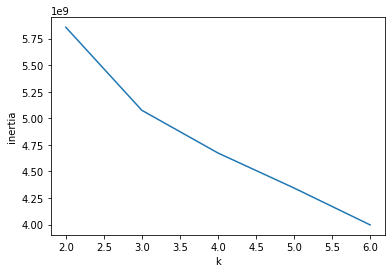

In [26]:
inertia = []
for k in range(2,7):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(fruits_2d)
    inertia.append(km.inertia_)
plt.plot(range(2,7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

### PCA

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components=50) # 주성분의 개수 
pca.fit(fruits_2d)

PCA(n_components=50)

In [28]:
print(pca.components_.shape)

(50, 10000)


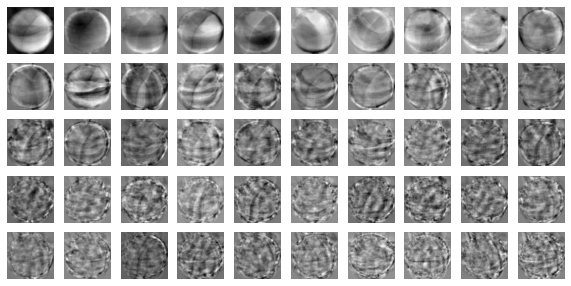

In [29]:
draw_fruits(pca.components_.reshape(-1,100,100))

In [30]:
print(fruits_2d.shape)

(300, 10000)


In [31]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


#### 원본 데이터 재구성

In [32]:
fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


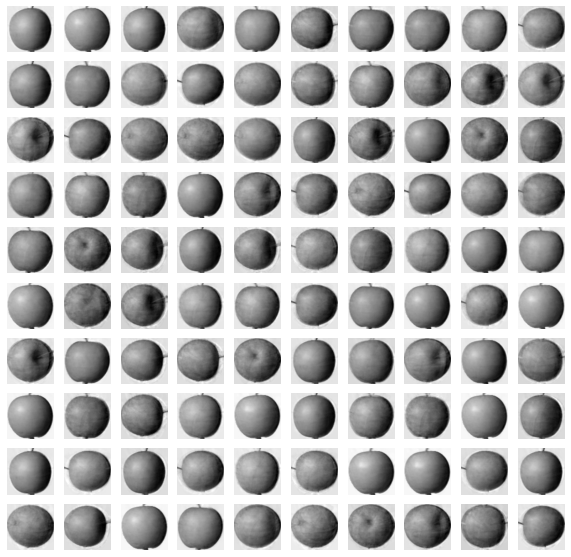

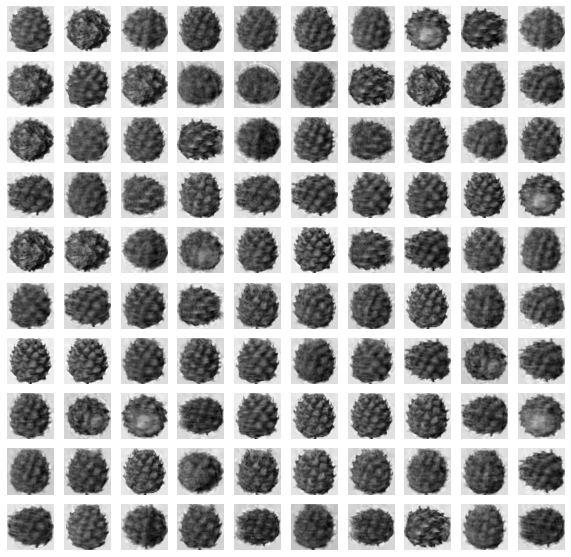

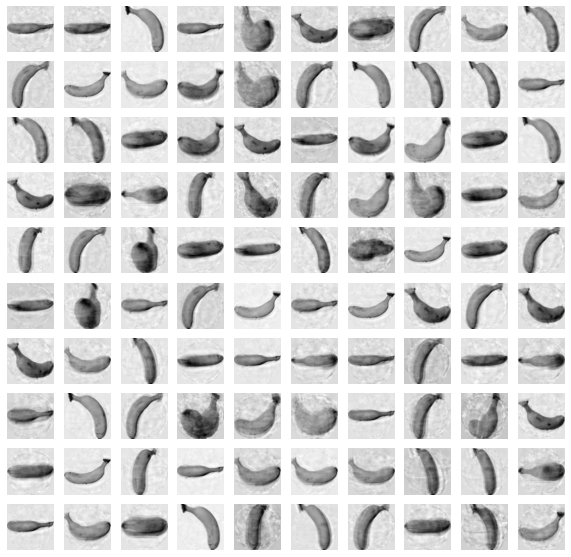

In [33]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0,100,200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print("\n")

- explained_variance_ratio_ : PCA 클래스의 각 주성분의 설명된 분산 비율 기록

In [34]:
print(np.sum(pca.explained_variance_ratio_))

0.9215325894981371


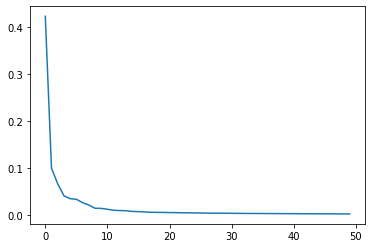

In [35]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

- 차원 축소된 데이터를 사용하여 지도 학습 모델 훈련

In [36]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [40]:
target = np.array([0]*100 + [1]*100+[2]*100)

In [38]:
from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.7070713996887207


In [41]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.023777151107788087


In [42]:
# 설명된 분산의 50%에 달하는 주성분을 찾도록 하는 PCA 모델 만들기
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [43]:
print(pca.n_components_)

2


- 2개의 특성으로 원본 데이터에 있는 분산의 50%를 표현

In [44]:
fruits_pca = pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 2)


In [45]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.03147401809692383


C:\Users\82109\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\82109\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

In [46]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2]), array([110,  99,  91], dtype=int64))


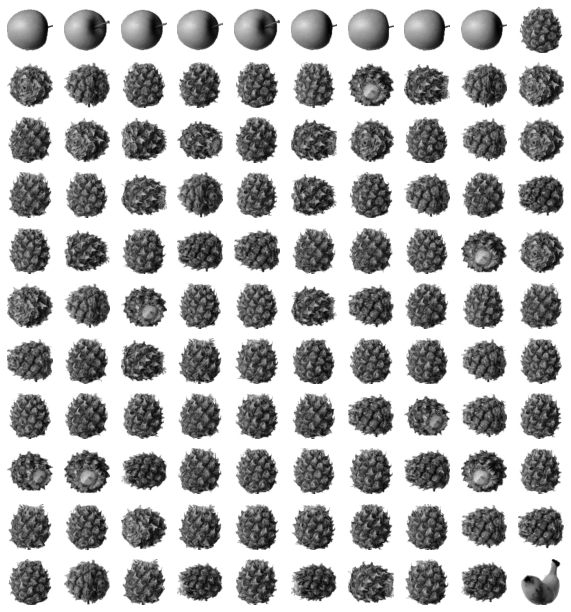

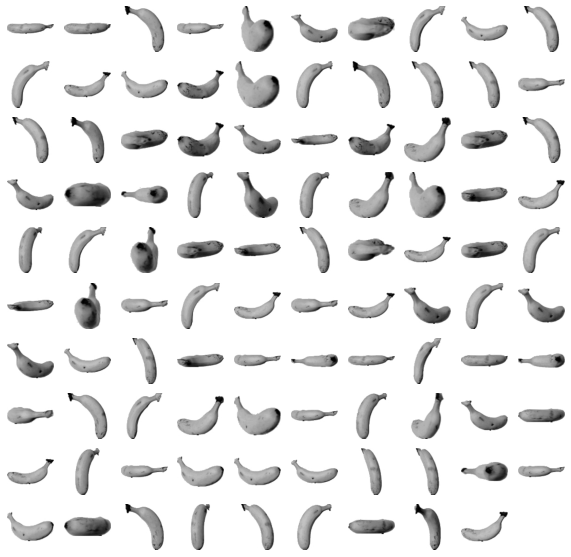

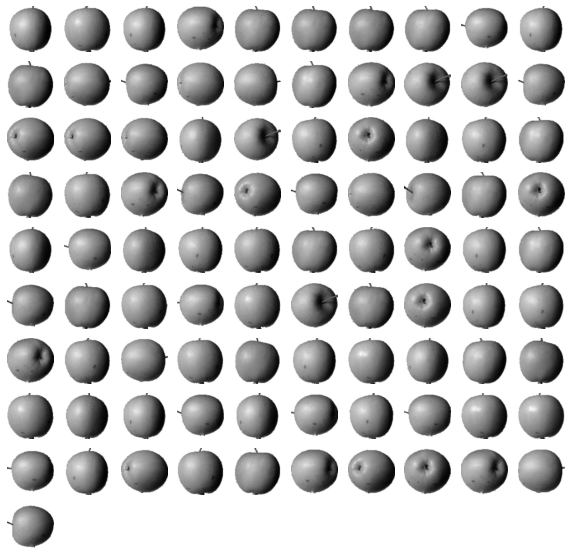

In [48]:
for label in range(0,3):
    draw_fruits(fruits[km.labels_ == label])
    print("\n")

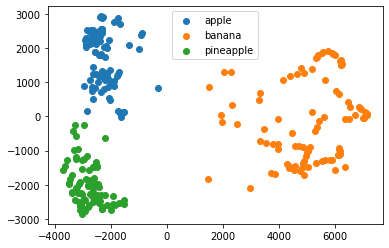

In [49]:
for label in range(0,3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:,1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()